Title: 2022-11-30 Boston Housing Dataset 

To:&nbsp;&nbsp;&nbsp;&nbsp; Magnimind

From: Matt Curcio, matt.curcio.ri@gmail.com

Date: 2022-10-30

Re:&nbsp;&nbsp;&nbsp; Boston Housing Dataset - ML 2

# Boston Housing Dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

**Import the boston house dataset**

**Step 1:**
- Import the boston house dataset.
- Create train and test datasets. 
- Check the data description and familiarize yourself with the data.

In [2]:
boston = load_boston()
x_train,x_test,y_train,y_test = train_test_split(boston['data'],boston['target'], random_state=100);

In [3]:
print('\nThe shapes subsets are: x_train, x_test, y_train, y_test')
x_train.shape, x_test.shape, y_train.shape, y_test.shape 


The shapes subsets are: x_train, x_test, y_train, y_test


((379, 13), (127, 13), (379,), (127,))

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Step 2:** Create scatter plots for each feature versus median house price.

In [6]:
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df['MEDV'] = boston['target']

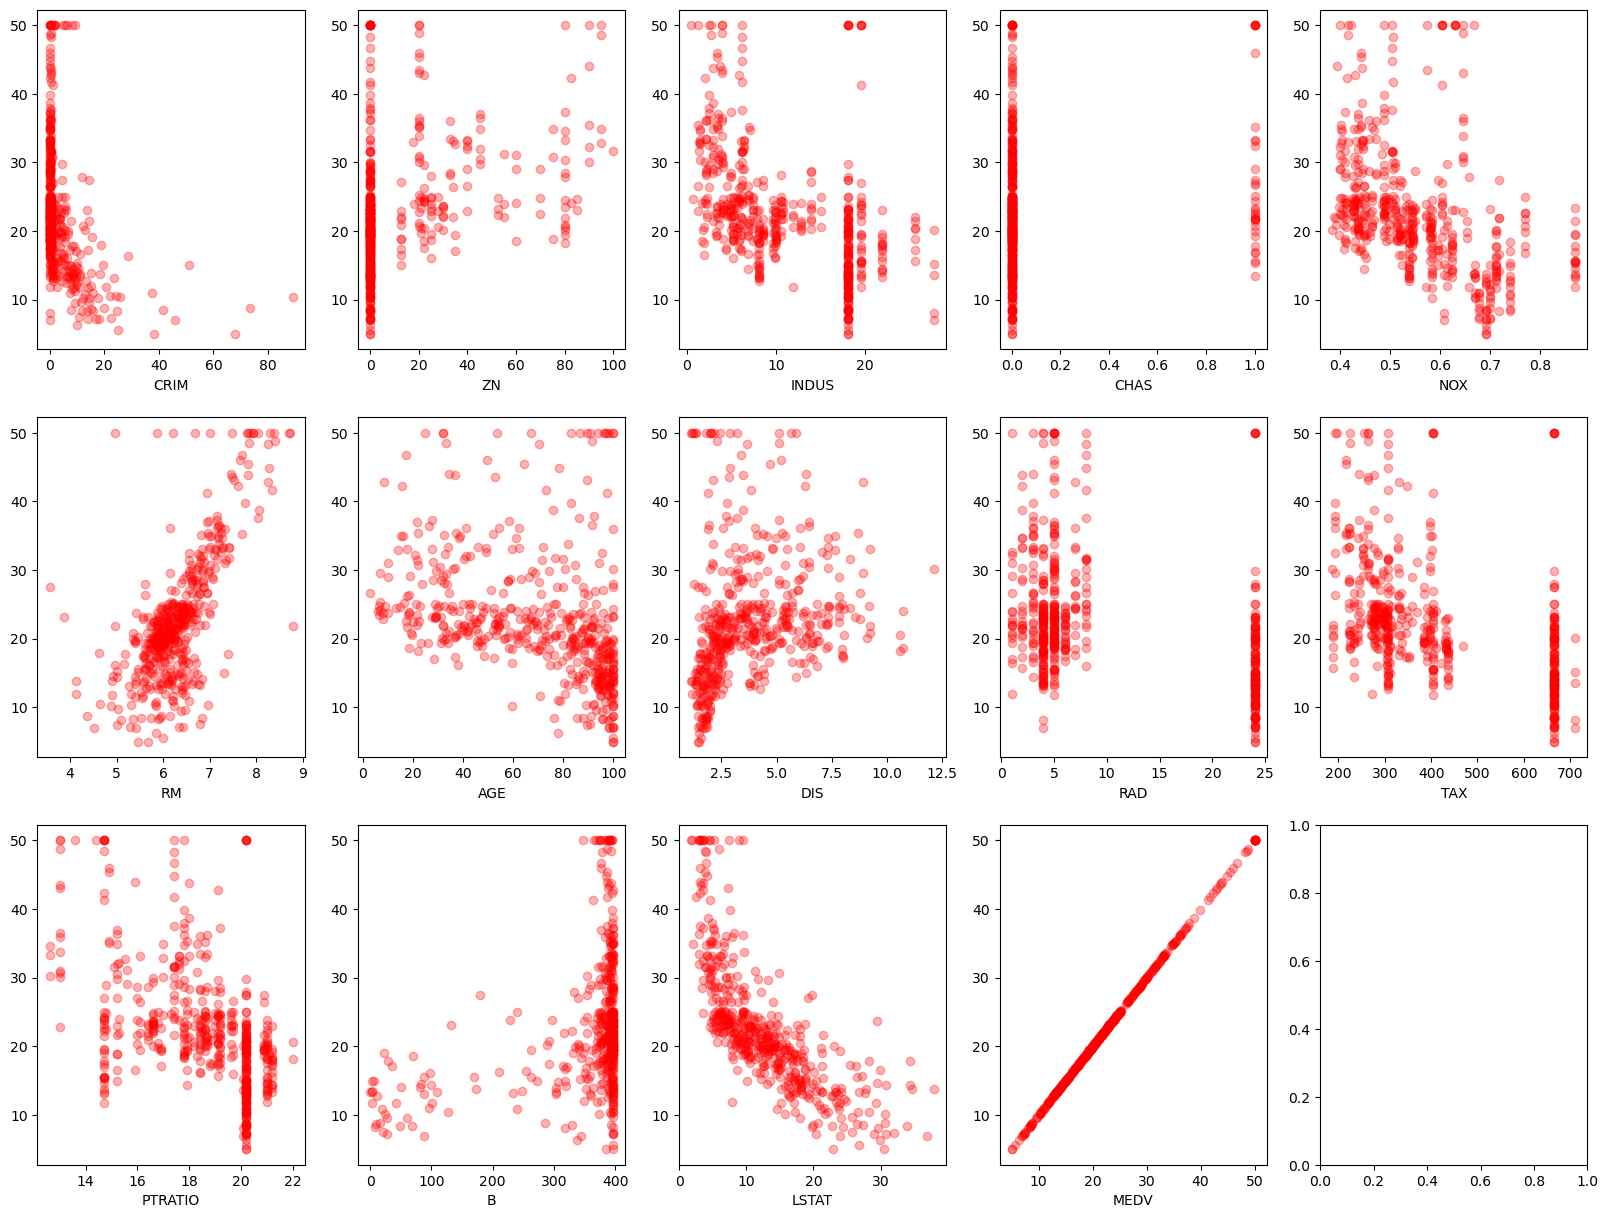

In [7]:
fig, axes = plt.subplots(3, 5, figsize=(20, 15))

y = df.MEDV 
for i, axis in enumerate(axes.ravel()):
    if i != 14:
        x = df.iloc[:, i]
        axis.scatter(x, y, alpha=0.3, color='red')
        axis.set_xlabel(df.columns[i])

**Step 3:** Create a box plot of all attributes.

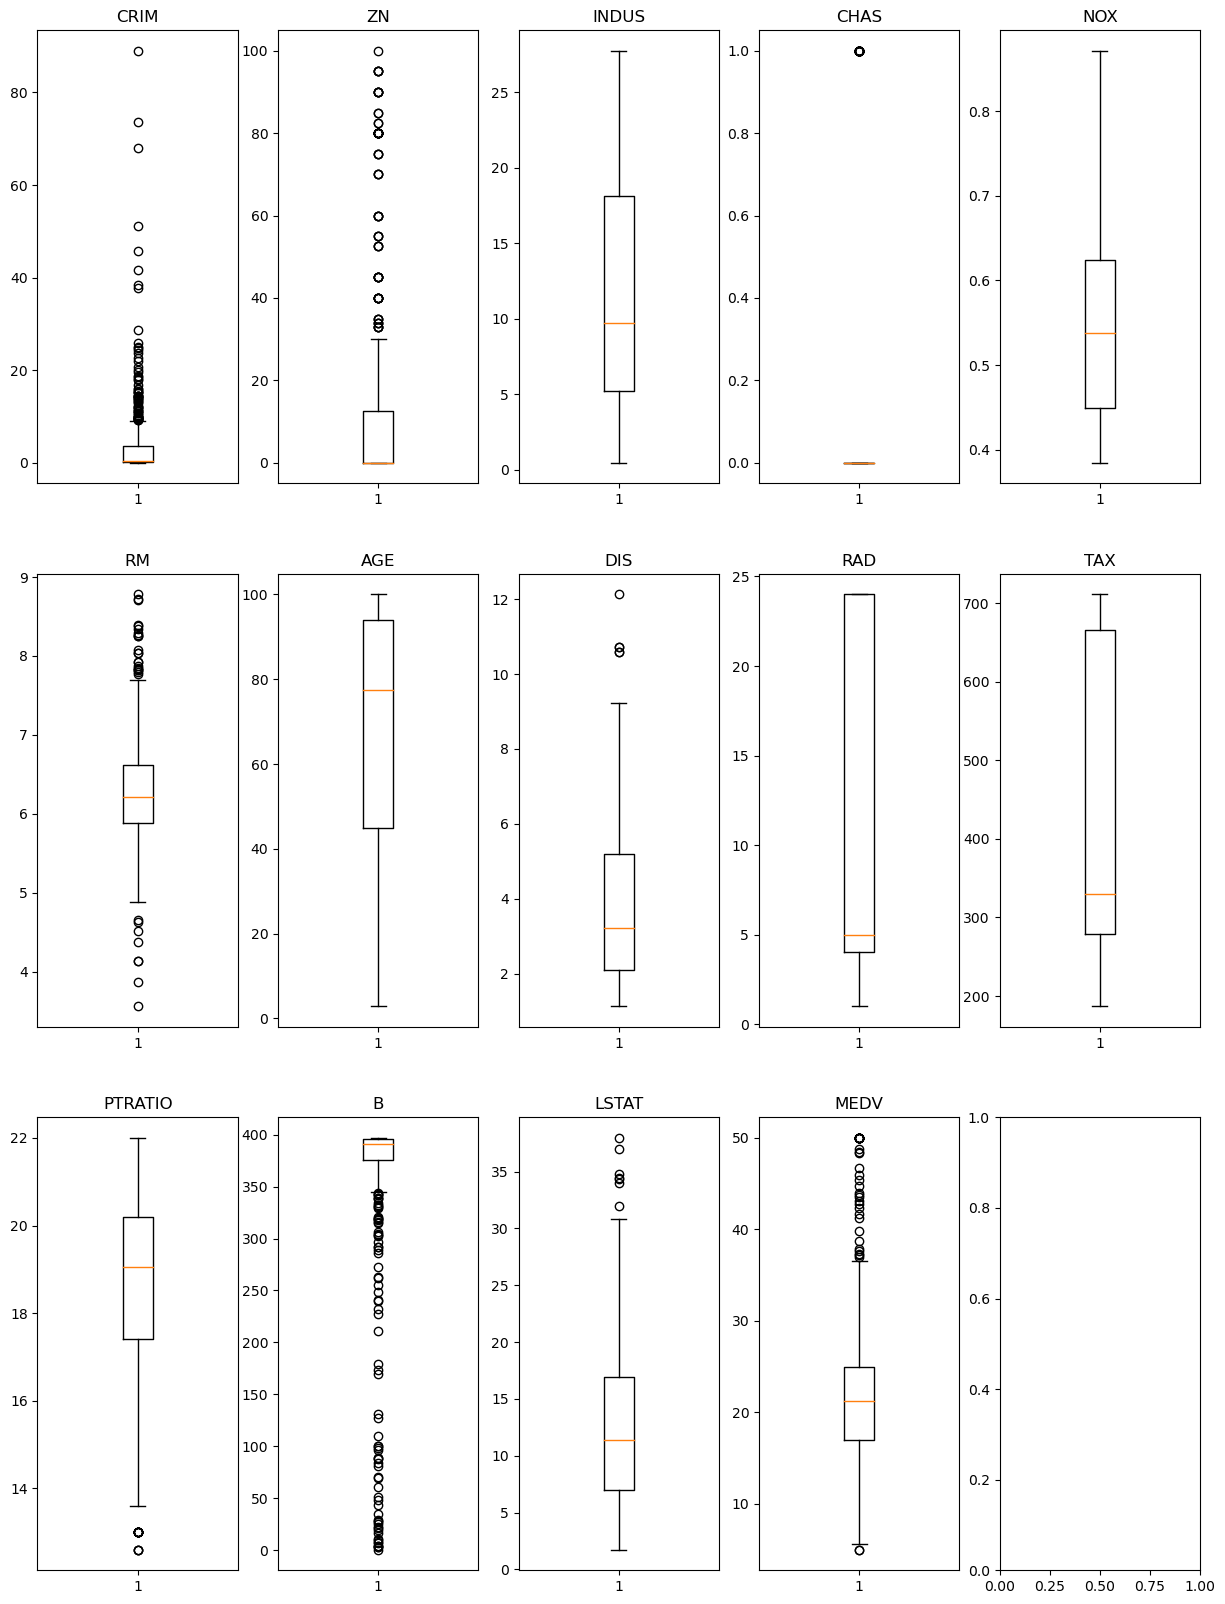

In [8]:
fig, axes = plt.subplots(3, 5, figsize=(15,20))

for i, axis in enumerate(axes.ravel()):
    if i != 14:
        x = df.iloc[:, i]
        axis.boxplot(x)
        axis.set_title(df.columns[i])

**Step 4:** Use `StandardScaler()` to scale training dataset.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.fit_transform(x_test)

**Step 5:** Using `KNeighborsRegressor()` 
- 1) Not-scaled 
- 2) Scaled datasets. 
- Compare scores.

In [10]:
## 1) NOT-SCALED dataset

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

knn.fit(x_train, y_train)
knn.score(x_test,y_test)

0.44371014889060933

In [11]:
## 2) SCALED dataset

knn.fit(x_train_scaled,y_train)
knn.score(x_test_scaled,y_test)

0.7895703307060491

|         KNN Method |  Score |
|-------------------:|-------:|
| Dataset NOT-SCALED | 0.4437 |
|     Dataset SCALED | 0.7896 |


**NOTE 1:** Percent Change = $\large \frac{0.7896 ~-~ 0.4437}{0.4437}$ $\cdot 100\% = +~77.98\%$

**Step 6:** Regression using `RandomForestRegressor`

- `RandomForestRegressor(n_estimators=100, random_state=0)`
- 1)Not-scaled
- 2)scaled datasets. 
- Compare scores

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)

rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8689248026420293

In [13]:
rf.fit(x_train_scaled,y_train)
rf.score(x_test_scaled,y_test)

0.7771362539132796

| Random Forest Regressor Method |  Score |
|-------------------------------:|-------:|
|             Dataset NOT-SCALED | 0.8689 |
|                 Dataset SCALED | 0.7771 |

**NOTE 2:** Percent Change = $\large \frac{0.7771 ~-~ 0.8689}{0.8689}$ $\cdot 100\% = -10.56\%$